In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.cluster import KMeans
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.io as pio
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.utils.metric import distance_metric, type_metric

In [2]:
# Ruta absoluta al archivo CSV
csv_path = Path(r"e:\Maestría_Eafit2024\Maestria\Trabajo de grado\DataLab2\archive\data-science-project\data\stage\df_XDB_ID.csv")

# Leer el CSV directamente
df_XDB = pd.read_csv(csv_path, encoding="utf-8-sig")

# Mostrar primeras filas
df_XDB.head()

,Smoking,Family History of Anxiety,Stress Level,Diet Quality,Anxiety Level,Therapy Sessions (per month),Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Heart Rate (bpm),ID,fecha,time
0,False,True,0.888889,0.111111,0.4,0.000000,0.25,0.6,0.293823,0.728814,1,2022-01-03,1
1,False,False,0.111111,0.777778,0.4,0.444444,0.50,0.8,0.779633,0.118644,1,2022-01-31,2
2,True,False,1.000000,0.000000,1.0,1.000000,0.00,0.0,0.816361,0.627119,2,2022-01-08,1
3,False,False,0.666667,0.000000,1.0,0.888889,0.25,0.0,0.218698,0.610169,2,2022-02-12,2
4,False,False,1.000000,0.333333,1.0,0.888889,1.00,0.6,0.984975,0.711864,3,2022-01-13,1


In [3]:
cols_numericas = df_XDB.select_dtypes(include=['float64', 'int64']).columns
df_numericas = df_XDB[cols_numericas]


In [4]:
from scipy import stats
import numpy as np

resultados = []
for col in df_numericas.columns:
    data = df_numericas[col].dropna()
    data = data[data > 0]  # eliminar ceros/negativos
    
    if len(data) > 3:  # se necesita más de 3 observaciones
        log_data = np.log(data)
        stat_shapiro, p_shapiro = stats.shapiro(log_data)
        shape, loc, scale = stats.lognorm.fit(data)
        stat_ks, p_ks = stats.kstest(data, 'lognorm', args=(shape, loc, scale))
        
        resultados.append({
            "Variable": col,
            "Shapiro_p": p_shapiro,
            "KS_p": p_ks
        })

df_resultados = pd.DataFrame(resultados)
print(df_resultados.sort_values("Shapiro_p", ascending=False))


e:\Maestría_Eafit2024\Maestria\Trabajo de grado\DataLab2\archive\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)
e:\Maestría_Eafit2024\Maestria\Trabajo de grado\DataLab2\archive\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19456.
  res = hypotest_fun_out(*samples, **kwds)
e:\Maestría_Eafit2024\Maestria\Trabajo de grado\DataLab2\archive\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20155.
  res = hypotest_fun_out(*samples, **kwds)
e:\Maestría_Eafit2024\Maestria\Trabajo de grado\DataLab2\archive\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, c

                       Variable      Shapiro_p          KS_p
3  Therapy Sessions (per month)   3.703657e-75  0.000000e+00
1                  Diet Quality   1.492274e-78  0.000000e+00
5  Physical Activity (hrs/week)   3.288482e-81  0.000000e+00
2                 Anxiety Level   3.032922e-83  0.000000e+00
0                  Stress Level   2.257293e-85  0.000000e+00
4                   Sleep Hours   7.215222e-86  0.000000e+00
6      Caffeine Intake (mg/day)   3.033474e-89  4.021929e-42
7              Heart Rate (bpm)   9.279168e-90  1.026563e-89
8                            ID   7.429387e-93  3.990953e-63
9                          time  2.705058e-110  0.000000e+00


e:\Maestría_Eafit2024\Maestria\Trabajo de grado\DataLab2\archive\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22000.
  res = hypotest_fun_out(*samples, **kwds)


e:\Maestría_Eafit2024\Maestria\Trabajo de grado\DataLab2\archive\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)


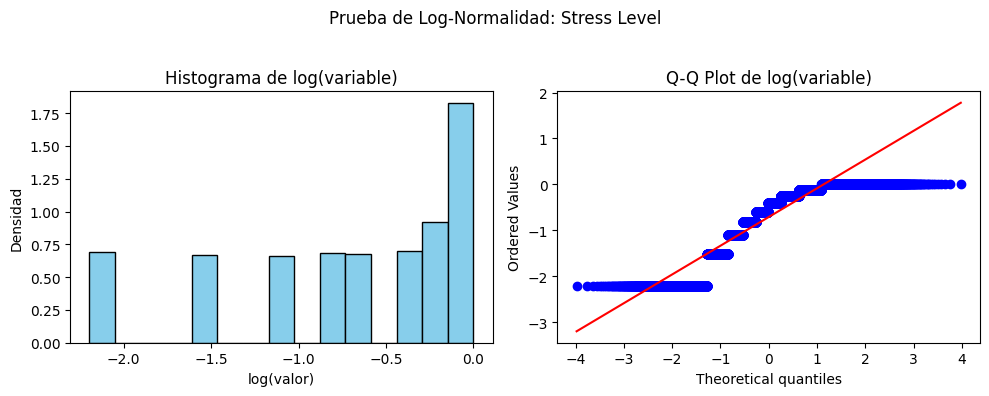

📊 Resultados para Stress Level:
  • Shapiro–Wilk: estadístico=0.8537, p-valor=0.0000
  • Kolmogorov–Smirnov: estadístico=0.4831, p-valor=0.0000
❌ Se rechaza H₀ → Stress Level no es Log-normal



e:\Maestría_Eafit2024\Maestria\Trabajo de grado\DataLab2\archive\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20155.
  res = hypotest_fun_out(*samples, **kwds)


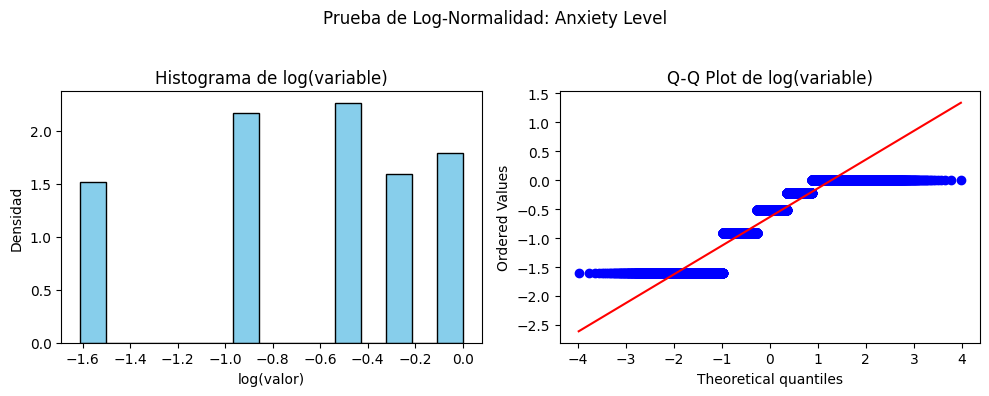

📊 Resultados para Anxiety Level:
  • Shapiro–Wilk: estadístico=0.8676, p-valor=0.0000
  • Kolmogorov–Smirnov: estadístico=0.4878, p-valor=0.0000
❌ Se rechaza H₀ → Anxiety Level no es Log-normal



In [8]:


# 2️⃣ Seleccionar las variables numéricas (observables y no observables)
cols_num = df_XDB.select_dtypes(include=['float64', 'int64']).columns

# 3️⃣ Función para graficar y probar log-normalidad
def test_log_normality(data, var_name):
    data = data.dropna()
    data = data[data > 0]  # log solo para valores positivos
    if len(data) < 3:
        print(f"{var_name}: No hay suficientes datos.")
        return
    
    log_data = np.log(data)
    
    # Pruebas estadísticas
    stat_sw, p_sw = stats.shapiro(log_data)
    shape, loc, scale = stats.lognorm.fit(data)
    stat_ks, p_ks = stats.kstest(data, 'lognorm', args=(shape, loc, scale))
    
    # Gráficos
    plt.figure(figsize=(10,4))
    plt.suptitle(f"Prueba de Log-Normalidad: {var_name}", fontsize=12)
    
    # Histograma de log(variable)
    plt.subplot(1,2,1)
    plt.hist(log_data, bins=15, color='skyblue', edgecolor='k', density=True)
    plt.title("Histograma de log(variable)")
    plt.xlabel("log(valor)")
    plt.ylabel("Densidad")
    
    # Q-Q Plot
    plt.subplot(1,2,2)
    stats.probplot(log_data, dist="norm", plot=plt)
    plt.title("Q-Q Plot de log(variable)")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    # Resultados estadísticos
    print(f"📊 Resultados para {var_name}:")
    print(f"  • Shapiro–Wilk: estadístico={stat_sw:.4f}, p-valor={p_sw:.4f}")
    print(f"  • Kolmogorov–Smirnov: estadístico={stat_ks:.4f}, p-valor={p_ks:.4f}")
    
    if p_sw > 0.05 and p_ks > 0.05:
        print(f"✅ No se rechaza H₀ → {var_name} es Log-normal\n")
    else:
        print(f"❌ Se rechaza H₀ → {var_name} no es Log-normal\n")

# 4️⃣ Aplicar a las principales variables (puedes listar las que más te interesen)
for var in ["Stress Level", "Anxiety Level"]:
    if var in df_XDB.columns:
        test_log_normality(df_XDB[var], var)
